In [1]:
import re

from collections import Counter

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Input, LSTM, GRU


from keras_preprocessing.sequence import pad_sequences

In [2]:
!git clone https://github.com/Terkingil/Project_NLP.git

Cloning into 'Project_NLP'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 300 (delta 18), reused 0 (delta 0), pack-reused 258
Receiving objects: 100% (300/300), 68.17 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [3]:
#from google.colab import files
 
 
#uploaded = files.upload()


#Инициализация моделей

## Name_model - модель для отделения имен от абракадабры

In [4]:
#model

Name_model=Sequential()
Name_model.add(Embedding(63,15,input_length=15))
Name_model.add(LSTM(500, activation='tanh'))
Name_model.add(Dense(1, activation='sigmoid'))
Name_model.summary()

Name_model.compile(loss='binary_crossentropy', metrics=["AUC"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 15)            945       
                                                                 
 lstm (LSTM)                 (None, 500)               1032000   
                                                                 
 dense (Dense)               (None, 1)                 501       
                                                                 
Total params: 1,033,446
Trainable params: 1,033,446
Non-trainable params: 0
_________________________________________________________________


Tokenize

In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/Terkingil/Project_NLP/main/Models%20weights%20n%20data/Name%20model%20weights/Name%20or%20abra.csv")
display(data)

,Name,Abra
0,Damir,1.0
1,Maryana,1.0
2,Roman,1.0
3,Kirill,1.0
4,Egor,1.0
...,...,...
195,Filipp,1.0
196,Yuliana,1.0
197,Veronika,1.0
198,adad,0.0


In [6]:
#tokenize

cdt_N=np.array(data.iloc[:,0])

num_char = 63
n_tokenizer=Tokenizer(num_words=num_char, lower=False,char_level=True,filters="'!#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n'")
n_tokenizer.fit_on_texts(cdt_N)
print(n_tokenizer.word_index)

inp_chars = 3
one_hot_enc=n_tokenizer.texts_to_sequences(cdt_N)

{'a': 1, 'i': 2, 's': 3, 'o': 4, 'd': 5, 'k': 6, 'r': 7, 'l': 8, 'p': 9, 'e': 10, 'n': 11, 'A': 12, 'j': 13, 'f': 14, 'y': 15, 't': 16, 'm': 17, 'S': 18, 'q': 19, 'v': 20, 'u': 21, '[': 22, 'D': 23, '3': 24, 'M': 25, '2': 26, 'V': 27, 'z': 28, 'g': 29, '1': 30, 'w': 31, 'E': 32, ';': 33, 'h': 34, 'K': 35, 'P': 36, '4': 37, "'": 38, 'U': 39, 'N': 40, 'I': 41, 'O': 42, 'L': 43, 'B': 44, 'x': 45, '/': 46, 'T': 47, 'Y': 48, 'R': 49, 'b': 50, 'J': 51, 'F': 52, 'W': 53, 'G': 54, ' ': 55, 'H': 56, 'Z': 57, '\\': 58, 'c': 59, '9': 60}


In [7]:
Name_model.load_weights('/content/Project_NLP/Models weights n data/Name model weights/weights')

## S_C_model - модель для отделения городов и фамлий от абракадабры

In [8]:
S_C_model=Sequential()
S_C_model.add(Embedding(63,15,input_length=15))
S_C_model.add(GRU(500, activation='tanh'))
S_C_model.add(Dense(1, activation='sigmoid'))#Полносвязный слой
S_C_model.summary()

S_C_model.compile(loss='binary_crossentropy', metrics=["AUC"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 15)            945       
                                                                 
 gru (GRU)                   (None, 500)               775500    
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 776,946
Trainable params: 776,946
Non-trainable params: 0
_________________________________________________________________


In [9]:
S_C_model.load_weights('/content/Project_NLP/Models weights n data/S_C_model/S_C_weights')

Tokenize

In [10]:
data=pd.read_csv("https://raw.githubusercontent.com/Terkingil/Project_NLP/main/Models%20weights%20n%20data/S_C_model/NE%20or%20abra.csv")
display(data)

,Name,Label
0,erer,0.0
1,Moscow,1.0
2,13op,0.0
3,Ilina,1.0
4,Tyumen,1.0
...,...,...
384,Serdyuk,1.0
385,Temchenko,1.0
386,Hitruk,1.0
387,Emelyanova,1.0


In [11]:

cdt_NE=np.array(data.iloc[:,0])

s_c_tokenizer=Tokenizer(num_words=num_char, lower=False,char_level=True,filters="'!#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n'")
s_c_tokenizer.fit_on_texts(cdt_NE)

inp=["Edgar"]
inp_sname_tkzd=s_c_tokenizer.texts_to_sequences(inp)
inp_sname_tkzd_pded=pad_sequences(inp_sname_tkzd, padding="post", truncating="post", maxlen=15)

  #print(inp_enc_pded)

surname_hyppo = (S_C_model.predict(inp_sname_tkzd_pded))

surname_hyppo

1/1 [==============================] - 2s 2s/step


array([[0.97341645]], dtype=float32)

## G_model - модель определяющая пол по имени

In [12]:
G_model=Sequential()
G_model.add(Embedding(28,20,input_length=20))
G_model.add(GRU(500, activation='tanh',return_sequences=True))
G_model.add(GRU(250, activation='tanh'))
G_model.add(Dense(1, activation='sigmoid'))#Полносвязный слой
G_model.summary()

G_model.compile(loss='binary_crossentropy', metrics=["AUC"])#categorical cross entropy ruined a model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 20)            560       
                                                                 
 gru_1 (GRU)                 (None, 20, 500)           783000    
                                                                 
 gru_2 (GRU)                 (None, 250)               564000    
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 1,347,811
Trainable params: 1,347,811
Non-trainable params: 0
_________________________________________________________________


In [13]:
G_model.load_weights('/content/Project_NLP/Models weights n data/GRU_weights_500_250/GRU_weights_500_250')

Tokenizer

In [14]:
#tokenizing Names

Full_Name_df=pd.read_csv("/content/Project_NLP/Full_Names.csv")

cdt_Names=np.array(Full_Name_df.iloc[:,0])

num_char = 28 # [a-z]+"-"+" "
g_tokenizer=Tokenizer(num_words=num_char, lower=True,char_level=True,filters="'!#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n'")
g_tokenizer.fit_on_texts(cdt_Names)


inp_chars = 3
one_hot_enc=g_tokenizer.texts_to_sequences(cdt_Names)


print(cdt_Names[2])
print(one_hot_enc[2])


from keras_preprocessing.sequence import pad_sequences

train_pded=pad_sequences(one_hot_enc, padding="pre", truncating="post", maxlen=20) 

print(train_pded[2])



inp=["Abramov"]

inp_enc=g_tokenizer.texts_to_sequences(inp)
#print(inp_enc)
inp_enc_pded=pad_sequences(inp_enc, padding="pre", truncating="post", maxlen=20)

#print(inp_enc_pded)

surname_hyppo = (G_model.predict(inp_enc_pded))

surname_hyppo

Cezar Zuev
[20, 7, 21, 1, 8, 6, 21, 17, 7, 3]
[ 0  0  0  0  0  0  0  0  0  0 20  7 21  1  8  6 21 17  7  3]
1/1 [==============================] - 1s 680ms/step


array([[0.99882835]], dtype=float32)

# Проверка корректноти данных

Для начала нужно установить библиотеку для нахождения расстояния Левенштейна

In [15]:
#Levenshtein distance

#Наивный способ методе Левенштейна очень дорог

#Сначао нужно установить билиотеку

!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 5.0 MB/s 
     |████████████████████████████████| 2.2 MB 62.1 MB/s 


In [16]:
from Levenshtein import distance as lev_distance

Av_Names=pd.read_csv("https://raw.githubusercontent.com/Terkingil/Project_NLP/main/Avialable%20Names.csv") #load dict of names
Av_Cities=pd.read_csv("https://raw.githubusercontent.com/Terkingil/Project_NLP/main/Aviable%20Cities.csv") #load dict of cities
Av_Names=np.array(Av_Names)
Av_Cities=np.array(Av_Cities)

## Функция проверки имени

In [17]:
from dataclasses import replace
#predict Name


def candName(a):

  a=a.replace(" ","") # очищаем от пробелов так как это очень сильно влияет на модель

  global tokenizer
  global Av_Names

  inp=[a]

  inp_name_tkzd=n_tokenizer.texts_to_sequences(inp)
  #print(inp_enc)
  inp_name_tkzd_pded=pad_sequences(inp_name_tkzd, padding="post", truncating="post", maxlen=15)

  #print(inp_enc_pded)

  name_hyppo = (Name_model.predict(inp_name_tkzd_pded))
  #print(name_hyppo)
  if name_hyppo[0]>0.3:
    isName=True
  else:
    isName=False
  
  #print(name_hyppo)


  if isName:
    min_dist=9999
    ans=""

    possible_names=np.array([])

    for i in Av_Names:
      tmp=lev_distance(a,i[0])
      if min_dist>=tmp:
        min_dist=tmp
        ans=i[0]
        possible_names=np.append(possible_names,i[0])
        cand_name=ans
  else:
    cand_name=""

  #print(possible_names)
  return cand_name, isName


In [18]:
candName("Alexei")

1/1 [==============================] - 1s 580ms/step


('Alexey', True)

## Функция проверки фамилии

In [19]:
#SurNameCheck


def candSName(a):

  a=a.replace(" ","") # очищаем от пробелов так как это очень сильно влияет на модель

  global s_c_tokenizer
  

  inp=[a]

  inp_sname_tkzd=s_c_tokenizer.texts_to_sequences(inp)
  #print(inp_enc)
  inp_sname_tkzd_pded=pad_sequences(inp_sname_tkzd, padding="post", truncating="post", maxlen=15)

  #print(inp_enc_pded)

  surname_hyppo = (S_C_model.predict(inp_sname_tkzd_pded))

  #print(surname_hyppo)
  #print(surname_hyppo[0])
  if surname_hyppo[0]>0.2:
    isSurN=True
    cand_surname=a
    cand_surname=(cand_surname[0]).upper()+cand_surname[1:]# Чтобы все фамилии были с большой буквы
  else:
    isSurN=False
    cand_surname=""
  
  cand_surname=cand_surname.replace(" ","")
  return cand_surname,isSurN




In [20]:
candSName("Edgar")

1/1 [==============================] - 0s 21ms/step


('Edgar', True)

## Функция создания почты

In [21]:
#MakingEmail

def makeEmail(cand_name,cand_surname,isName,isSurN):

  global reworked_table

  isMail=False

  if isName and isSurN:
    isMail=True
    cand_name=cand_name.replace(" ","")
    cand_surname=cand_surname.replace(" ","")

    cand_mail=((cand_name.lower()))+"."+(cand_surname.lower())+"@company.com"#Сначала попытамся сделать эмейл по полному имени

    not_unq_email=(cand_mail in reworked_table['EMAIL'].values)#Далее делаем эмейл по срезу имени
    i=1
    while (not_unq_email): 
      cand_mail=((cand_name.lower())[:i])+"."+(cand_surname.lower())+"@company.com"
      not_unq_email=(cand_mail in reworked_table['EMAIL'].values)
      i+=1
      

  else:
    cand_mail=None
  return cand_mail,isMail

## Функция проверки телефона

In [22]:
#Telephone_Check

import re

bad_exmpls=[]

for i in range(0,10):
  bad_exmpls.append("7"+10*str(i))

bad_exmpls.append("71234567890")


def isPhone(a):
  
  a=re.sub(r'[^0-9]','',a)
  if len(a)==7:

    for i in bad_exmpls:
      if a==i[4:]:
        return "",False
    return a,True

  elif len(a)==6:

    for i in bad_exmpls:
      if a==i[5:]:
        return "",False
    return a,True


  else:
    return "",False

isPhone("0000000")


('', False)

## Функция проверки города

In [23]:
def isCity(a):

  a=a.replace(" ","") # очищаем от пробелов так как это очень сильно влияет на модель

  global s_c_tokenizer
  global Av_Cities

  inp=[a]

  inp_city_tkzd=s_c_tokenizer.texts_to_sequences(inp)
  #print(inp_enc)
  inp_city_tkzd_pded=pad_sequences(inp_city_tkzd, padding="post", truncating="post", maxlen=15)

  #print(inp_enc_pded)

  city_hyppo = (S_C_model.predict(inp_city_tkzd_pded))
  #print(surname_hyppo[0])
  if city_hyppo[0]>0.2:
    isCity=True
    city=a
  else:
    isCity=False
    city=""
  
  if isCity: #Проверяем расстояние Левинштейна для поиска ошибки
    min_dist=9999
    ans=""

    possible_cities=np.array([])

    for i in Av_Cities:
      tmp=lev_distance(a,i[0])
      if min_dist>=tmp:
        min_dist=tmp
        ans=i[0]
        possible_names=np.append(possible_cities,i[0])
        city=ans
  else:
    city=""

  #print(possible_cities)
  return city,isCity
  
  
  
  



## Функция определения пола по имени

In [24]:
#Gender check


def gIdent(cand_name,cand_surname,isName,isSName):

  global g_tokenizer

  if not(isName) and not(isSName):
    return None
  elif not(isName) and (isSName):
    a=cand_surname
  elif isName and not(isSName):
    a=cand_name+" "
  elif isName and (isSName):
    a=cand_name+" "+cand_surname

  inp=[a]
  #print(inp)
  inp_enc_g_tkzd=g_tokenizer.texts_to_sequences(inp)
  #print(inp_enc)
  inp_enc_g_tkzd_pded=pad_sequences(inp_enc_g_tkzd, padding="pre", truncating="post", maxlen=20)

  #print(inp_enc_pded)

  g_hyppo = (G_model.predict(inp_enc_g_tkzd_pded))

  #print(g_hyppo)
  if g_hyppo[0]>0.6:
    isGender=True
    gender="Male"
  elif g_hyppo[0]<0.4:
    isGender=True
    gender="Female"
  else:
    isGender=False
    gender="Unknown"
    
  return gender
  
gIdent("Sasha","Ermolenko",True,True)

1/1 [==============================] - 0s 29ms/step


'Male'

## Функция генерации пароля

In [25]:
def pass_gen():
  n=np.random.randint(8,13)#Длина от 8 до 12
  passw=""
  dic="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!#$%&\'()*+-?@_"
  for i in range(n):
    tmp=np.random.randint(0,len(dic))
    passw+=dic[tmp]
  return passw
  

# Cам алгоритм

In [26]:
task=pd.read_csv("Project_NLP/task_file_rew.txt")


display(task) #Видим что значения столбцов не совпадают со своими именами, переименовываем



,EMAIL,NAME,LAST_NAME,TEL,CITY,Unnamed: 5
0,Ivan,Abramov,7776514,Moscw,NaN,NaN
1,Alexey,Nikolaev,1348520,Moscow1,,NaN
2,Marina,iajsf,11311110,Moscow,,NaN
3,Dmitriy,Vasilyev,0000000,Kazan,,NaN
4,asjaks,Ilyina,,St.Petersburg,,NaN
...,...,...,...,...,...,...
59,Alexei,Savelievv,5456787,Omsk,NaN,NaN
60,Alexandra,Eermolina,3458723,Volgograd,NaN,NaN
61,Olga,Belova,5555555,Izhevsk,NaN,NaN
62,Ksenia,Izverova,5467328,jsdhf,NaN,NaN


In [27]:
reworked_table=task.copy()

reworked_table = reworked_table.set_axis(['NAME', 'LAST_NAM', 'TEL', 'CITY', 'EMAIL','GENDER'], axis=1, inplace=False)
reworked_table.insert(5, "PSWRD", reworked_table['EMAIL'])


reworked_table

,NAME,LAST_NAM,TEL,CITY,EMAIL,PSWRD,GENDER
0,Ivan,Abramov,7776514,Moscw,NaN,NaN,NaN
1,Alexey,Nikolaev,1348520,Moscow1,,,NaN
2,Marina,iajsf,11311110,Moscow,,,NaN
3,Dmitriy,Vasilyev,0000000,Kazan,,,NaN
4,asjaks,Ilyina,,St.Petersburg,,,NaN
...,...,...,...,...,...,...,...
59,Alexei,Savelievv,5456787,Omsk,NaN,NaN,NaN
60,Alexandra,Eermolina,3458723,Volgograd,NaN,NaN,NaN
61,Olga,Belova,5555555,Izhevsk,NaN,NaN,NaN
62,Ksenia,Izverova,5467328,jsdhf,NaN,NaN,NaN


In [ ]:

reworked_table=reworked_table.fillna("")# Меняем None на пустую строку чтобы не было проблем с проверкой строк


def check_valid_row(a): #Проверяем каждую строку таблицы и применяем написанные функции

  cand_name,isCand_Name=candName(a[0])
  cand_surname,isCand_SName=candSName(a[1])

  
  #print(cand_name,cand_surname)
  a[0]=cand_name
  a[1]=cand_surname

  
  a.loc["TEL"]=isPhone(a.loc["TEL"])[0]

  a.loc["EMAIL"],isUMail=makeEmail(cand_name,cand_surname,isCand_Name,isCand_SName)

  if isUMail:
    a.loc['PSWRD']=pass_gen()

  tmp=gIdent(cand_name,cand_surname,isCand_Name,isCand_SName)
  #print([tmp],[cand_name],[cand_surname],[isCand_Name],[isCand_SName])

  a.loc["CITY"]=isCity(a.loc["CITY"])[0]#29,62

  a.loc["GENDER"]=tmp
  return a

reworked_table=reworked_table.apply(check_valid_row, axis=1)

То что было

In [29]:
display(task)

,EMAIL,NAME,LAST_NAME,TEL,CITY,Unnamed: 5
0,Ivan,Abramov,7776514,Moscw,NaN,NaN
1,Alexey,Nikolaev,1348520,Moscow1,,NaN
2,Marina,iajsf,11311110,Moscow,,NaN
3,Dmitriy,Vasilyev,0000000,Kazan,,NaN
4,asjaks,Ilyina,,St.Petersburg,,NaN
...,...,...,...,...,...,...
59,Alexei,Savelievv,5456787,Omsk,NaN,NaN
60,Alexandra,Eermolina,3458723,Volgograd,NaN,NaN
61,Olga,Belova,5555555,Izhevsk,NaN,NaN
62,Ksenia,Izverova,5467328,jsdhf,NaN,NaN


То что стало

In [30]:
display(reworked_table)

,NAME,LAST_NAM,TEL,CITY,EMAIL,PSWRD,GENDER
0,Ivan,Abramov,7776514,Mosсow,ivan.abramov@company.com,Vp*FYdppR,Male
1,Alexey,Nikolaev,1348520,Mosсow,alexey.nikolaev@company.com,M*d4z6IS%r_0,Male
2,Marina,,,Mosсow,None,,Female
3,Dmitrij,Vasilyev,,Kazan,dmitrij.vasilyev@company.com,kKK)UEYmd0,Male
4,,Ilyina,,Sankt-Peterburg,None,,Female
...,...,...,...,...,...,...,...
59,Alexey,Savelievv,5456787,Omsk,alexey.savelievv@company.com,udW+ZADx$e,Male
60,Aleksandra,Eermolina,3458723,Volgograd,aleksandra.eermolina@company.com,I$N3x&6s+xX&,Female
61,Olga,Belova,,Izhevsk,olga.belova@company.com,dZ_Juyshjn,Female
62,Kseniya,Izverova,5467328,,kseniya.izverova@company.com,E*?E2hhDx,Female


# Ручное добавление новых данных в таблицу

In [31]:
def askUser(): #Добавление в виде формы

  global reworked_table
  
  pr_len=len(reworked_table) #Предыдущая длина

  isNumb=False 
  while not(isNumb):
    print("Cколько хотите добавить новых запсей?:")
    i=input()
    i=re.sub(r'[^0-9]','@@',i) #Проверка что введено именно число
    if not("@@" in i) and int(i)<1000:
      isNumb=True
      i=int(i)

  for j in range(i):
    new_row=np.array([])
    print('Введите имя: ')
    name=input()
    new_row=np.append(new_row, name)
    print('Введите фамилию: ')
    sname=input()
    new_row=np.append(new_row, sname)
    print('Введите телефон: ')
    tel=input()
    new_row=np.append(new_row, tel)
    print('Введите город: ')
    city=input()
    new_row=np.append(new_row, city)
    print(new_row)
    new_row=np.append(new_row, "")
    new_row=np.append(new_row, "")
    new_row=np.append(new_row, "")

    reworked_table.loc[len(reworked_table)+j] = new_row

  reworked_table.loc[pr_len-1:pr_len+(i-1)]=(reworked_table.loc[pr_len-1:pr_len+(i-1)]).apply(check_valid_row, axis=1)






In [32]:
def askUser_vect(a): #Добавление в виде массива

  a=np.array(a)

  global reworked_table
  
  pr_len=len(reworked_table) #Предыдущая длина

  
  a=np.append(a, "")
  a=np.append(a, "")
  a=np.append(a, "")

  reworked_table.loc[pr_len] = a

  reworked_table.loc[pr_len:pr_len]=(reworked_table.loc[pr_len:pr_len]).apply(check_valid_row, axis=1)

# Вывод графиков

В данном разделе выводятся разлиные диаграммы по обработанным данным

Все полностью автоматизировано При изменении датасета числа поменяются сами

Графики на гит хабе - скриншоты из ноутбука, из-за проблем совместимости plotly и github

In [33]:
chart_data=reworked_table.loc[:,"EMAIL"]
cnt=0

for i in chart_data:
  if not(pd.isna(i)):
    cnt+=1

len(chart_data)

pie_data=[cnt,len(chart_data)-cnt]

pie_data

[52, 12]

In [34]:
import plotly.express as px
from PIL import Image

fig=px.pie(values=pie_data,names=["With Email","Without Email"],title='Сколько людей из дата сета имеют почту')
fig.show()

Из-за того что в гит хаб не корректно отображаются из Plotly Я вставил скриншот графиков из ноутбука.

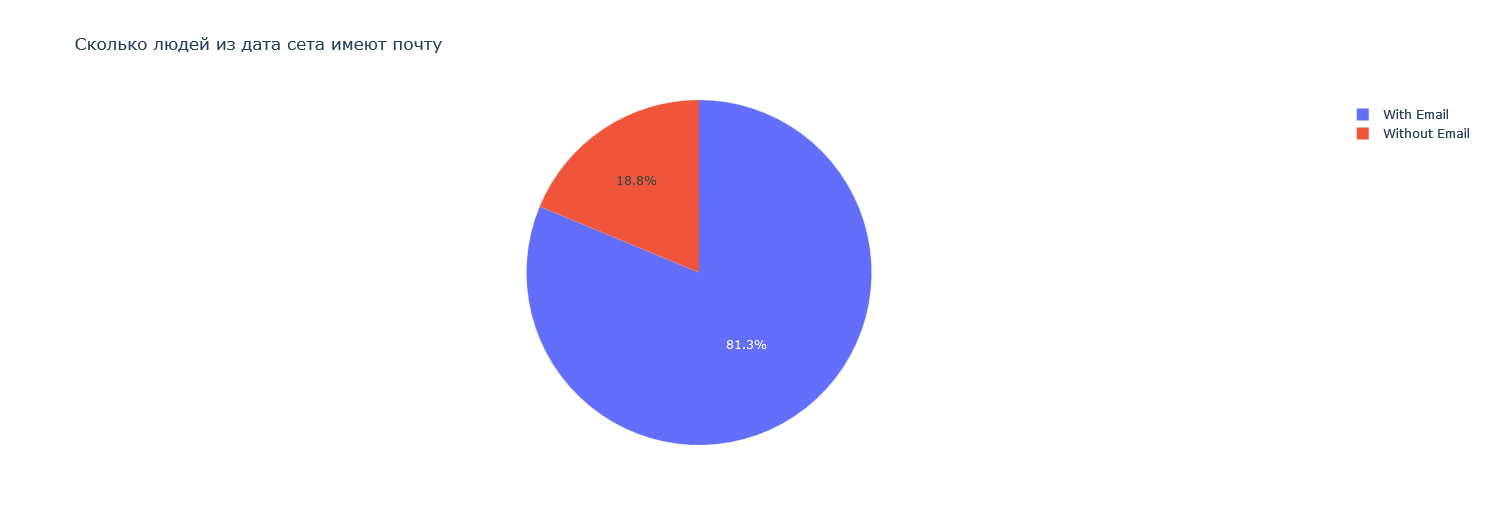

In [35]:
img = Image.open('/content/Project_NLP/Images/mails.png',mode='r')
img

In [36]:
#Посчитаем сколько Мужчин, Женщин или Неопределенных в датасете

m_number=reworked_table.loc[reworked_table["GENDER"]=="Male", "GENDER"].count()
f_number=reworked_table.loc[reworked_table["GENDER"]=="Female", "GENDER"].count()
other=(reworked_table[reworked_table["GENDER"].isin(["","Unknown",None])]).loc[:,"GENDER"].size

total=m_number+f_number+other
title="Распределение пола в датасете Всего {total:d}"


gender_pie=px.pie(values=[m_number,f_number,other],names=["Male","Female","Unknown"],title=title.format(total=total))
gender_pie.show()




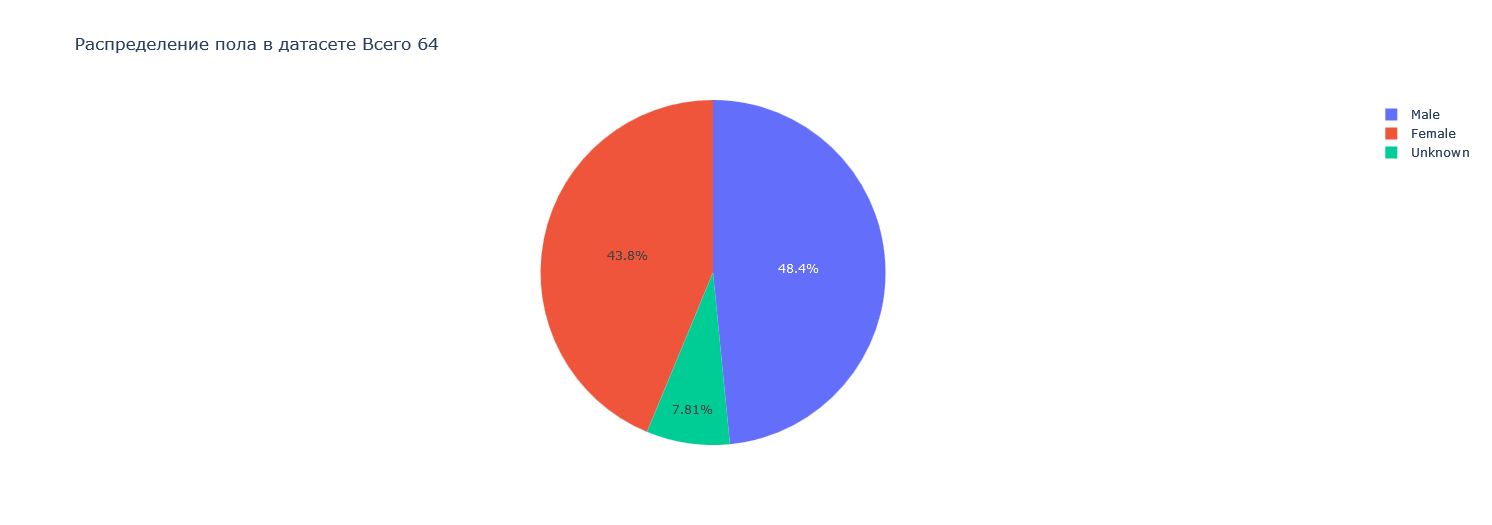

In [37]:
img = Image.open('/content/Project_NLP/Images/genders.png',mode='r')
img